<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# Data Gathering

In [80]:
df = pd.read_csv("car_dataset.csv")

In [81]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:
df.shape

(301, 9)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [84]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preparation

In [85]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [86]:
df["Car_age"]=2022-df.Year

In [87]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# Feature Engineering

In [88]:
df=pd.get_dummies(df, drop_first=True)

In [89]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [90]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price # target column

### Splitting data into training and testing

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [93]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm=LinearRegression(normalize=True)

In [96]:
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [97]:
lm.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
        2.53327258e+00,  7.38464226e-01, -1.19059291e+00, -1.63902155e+00])

In [101]:
lm.intercept_

5.43343718671575

# Interpret the model

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [99]:
y_pred=lm.predict(X_test)
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [100]:
X_test

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.570,24000,0,6,0,1,1,0
289,13.600,10980,0,6,0,1,0,1
228,9.400,60000,0,10,1,0,0,1
198,0.570,35000,1,11,0,1,1,1
60,18.610,40001,0,9,0,1,0,1
9,8.920,42367,0,7,1,0,0,1
118,1.470,26000,0,7,0,1,1,1
154,0.880,8000,0,8,0,1,1,1
164,0.540,14000,0,6,0,1,1,1
33,9.950,45000,0,8,1,0,0,1


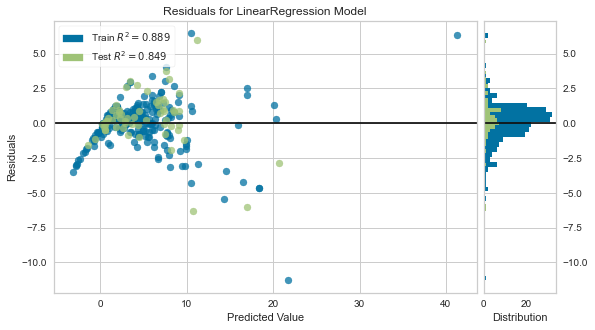

In [105]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

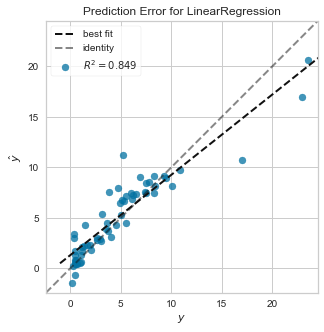

In [106]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Model Evaluation

In [107]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [108]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8489813024899066
MAE 		: 1.2162256821297057
MSE 		: 3.4788039706379035
RMSE 		: 1.8651552135513825


In [109]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [110]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
9,7.45,7.418254,0.031746
118,1.10,1.336443,-0.236443
154,0.50,0.840272,-0.340272
164,0.45,1.365019,-0.915019
33,6.00,7.490268,-1.490268


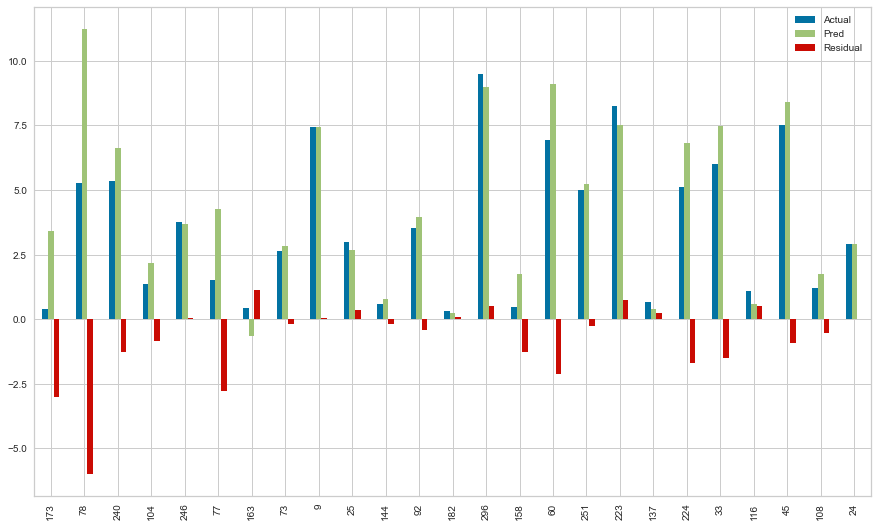

In [111]:
comparing.sample(25).plot(kind ="bar", figsize=(15,9))
plt.show()

# Regularization

# Ridge

In [114]:
from sklearn.linear_model import Ridge, RidgeCV

In [115]:
ridge_model = Ridge(random_state=42)

In [124]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_pred

array([ 2.90131068,  8.1952302 ,  6.40362854, -1.36836337,  9.11434327,
        7.37421664,  1.35764312,  0.85271316,  1.38499155,  7.44607969,
        9.08100851,  0.60071291,  8.34504386,  3.36861757,  6.85083764,
        3.03819298,  0.49270168, 10.74458995,  1.77481436,  2.37104455,
        0.40643217,  8.07629357,  6.56908038,  2.63252558,  0.79863141,
        3.67832663,  5.25022673,  2.80620724,  2.16239525,  1.77597345,
        0.40715548,  9.08880963, -0.66078336,  2.26625138,  8.53615246,
        4.48417049,  7.22459399,  7.55266691,  2.87649418,  7.95169019,
        3.92278013,  4.18534026,  4.32050627,  0.61921745,  7.29366985,
        0.49000203,  7.30591698, 11.18954159,  3.11928402,  5.32267143,
        6.71982939,  2.20364164, 20.59580165, 16.93403212,  7.46800235,
        9.64016349,  4.46224828,  8.94008969,  1.79074242,  7.52985982,
        0.23400587])

In [117]:
ridge_model.alpha

1.0

In [118]:
alpha_space = np.linspace(0.01,1.100)
alpha_space

array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ])

In [119]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [120]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [121]:
ridge_cv_model.alpha_

0.01

In [122]:
ridge_cv_model.best_score_

-1.9410612823023368

In [123]:
y_pred = ridge_cv_model.predict(X_test)
y_pred

array([ 2.95482914,  8.17908814,  6.45348799, -1.42360623,  9.08915367,
        7.41756474,  1.33667433,  0.84039303,  1.36523984,  7.4895739 ,
        9.11771239,  0.58588513,  8.41536796,  3.42265162,  6.8996671 ,
        3.04965392,  0.48454353, 10.7100985 ,  1.75232928,  2.34601164,
        0.39754212,  8.11858477,  6.62385093,  2.65897236,  0.78296611,
        3.69304089,  5.24810442,  2.8264212 ,  2.13670493,  1.75264297,
        0.39738533,  9.11700625, -0.66191784,  2.29057485,  8.57010807,
        4.49087407,  7.20547168,  7.53834003,  2.89074756,  7.93601021,
        3.93558662,  4.27033352,  4.33184198,  0.60107366,  7.33953034,
        0.47615861,  7.29198643, 11.23085172,  3.1377389 ,  5.38172714,
        6.79797355,  2.17917564, 20.63265082, 17.00076542,  7.50654215,
        9.69564716,  4.47455872,  8.97322361,  1.82244269,  7.60336992,
        0.22237024])

In [126]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131487
MAE 		: 1.2114288537899955
MSE 		: 3.452756236425436
RMSE 		: 1.8581593678760269


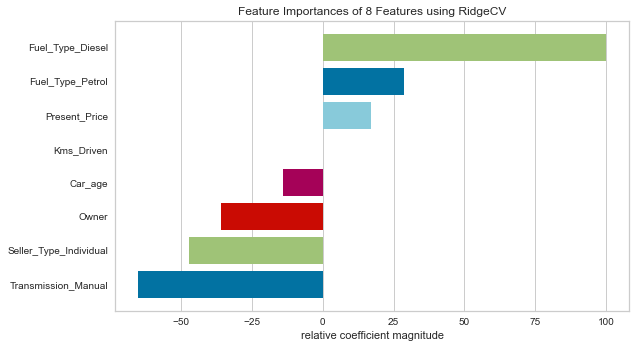

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [127]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [129]:
from sklearn.linear_model import Lasso, LassoCV

In [130]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7985538621024054
MAE 		: 1.4714179283504278
MSE 		: 4.640429535826084
RMSE 		: 2.154165624047066


In [131]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [132]:
lasso_cv_model.fit(X_train,y_train)
y_pred = lasso_cv_model.predict(X_test)

In [134]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917956242985
MAE 		: 1.20764432704656
MSE 		: 3.4370982030172126
RMSE 		: 1.8539412620191646


In [135]:
lasso_cv_model.alpha_

0.01

In [136]:
lasso_cv_model.mse_path_[-1].mean()

3.9638842268628296

## Elastic-Net 

In [137]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [138]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [139]:
y_pred = elastic_model.predict(X_test)

In [140]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8087884906376239
MAE 		: 1.4234255674689693
MSE 		: 4.404668885169283
RMSE 		: 2.098730303104542


In [142]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [145]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [146]:
elastic_cv_model.alpha_

0.01

In [147]:
elastic_cv_model.l1_ratio_

0.1

In [148]:
elastic_cv_model.mse_path_[5][-1].mean()

3.9638842268628296

In [150]:
y_pred = elastic_cv_model.predict(X_test)
y_train_pred = elastic_cv_model.predict(X_train)

In [151]:
elastic_cv_model.coef_

array([ 4.35282560e-01, -5.77786398e-06, -7.90429643e-01, -3.61098974e-01,
        1.34742964e+00, -3.51949702e-01, -1.10663417e+00, -1.46915492e+00])

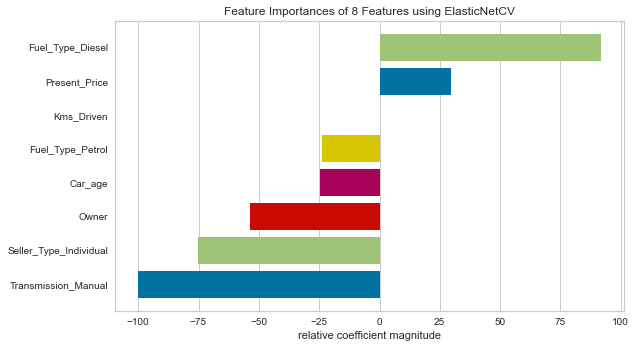

<AxesSubplot:title={'center':'Feature Importances of 8 Features using ElasticNetCV'}, xlabel='relative coefficient magnitude'>

In [152]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(elastic_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()